In [270]:
from okx.api import Account
from okx.api import Trade
from okx_api import Market as Market_api
from pprint import pprint
import json
import os
import time
import math
from dotenv import load_dotenv
from okx.app import OkxSPOT
load_dotenv()

True

In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.tsa.api as smt 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from datetime import datetime

In [272]:
market = Market_api(key = '', secret = '', passphrase = '', flag = '0')
okxSPOT = OkxSPOT(
    key="",
    secret="",
    passphrase="",
)

In [273]:
result = market.get_history_index_candles(instId = "INJ-USDT", bar = "6H")
# pprint(result['data'])
len(result['data'])

100

In [203]:
columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume']

data = pd.DataFrame(result['data'], columns = columns)
data['date'] = pd.to_datetime(data['timestamp'], unit = 'ms')
data.sort_values(by='date', inplace=True)
data.set_index('date', inplace = True)
data.drop('volume', axis=1, inplace = True)
data.drop('timestamp', axis=1, inplace = True)
arima_data = data["open"]

data[['open', 'high', 'low', 'close']] = data[['open', 'high', 'low', 'close']].apply(pd.to_numeric)

data

C:\Users\USER\AppData\Local\Temp\ipykernel_34084\2805740008.py:4: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  data['date'] = pd.to_datetime(data['timestamp'], unit = 'ms')


,open,high,low,close
date,,,,
2024-01-02 10:00:24.320,40.510,41.068,37.504,37.934
2024-01-02 16:00:51.200,37.937,38.635,36.866,37.043
2024-01-02 21:59:07.008,37.049,37.576,36.581,36.807
2024-01-03 03:59:33.888,36.809,37.828,36.773,37.250
2024-01-03 10:00:00.768,37.250,37.411,28.228,34.435
...,...,...,...,...
2024-01-26 03:59:16.480,31.871,32.580,31.494,32.233
2024-01-26 09:59:43.360,32.233,34.100,32.214,33.893
2024-01-26 16:00:10.240,33.893,34.545,33.601,33.863


<AxesSubplot: xlabel='date'>

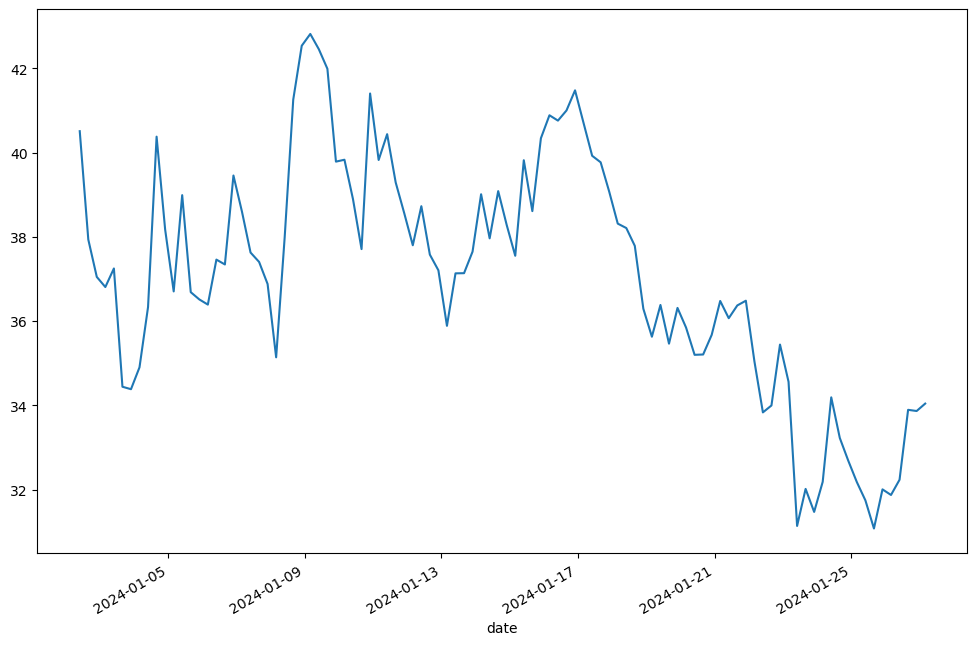

In [204]:
data['open'].plot(figsize=(12,8))

In [205]:
data['open']

date
2024-01-02 10:00:24.320    40.510
2024-01-02 16:00:51.200    37.937
2024-01-02 21:59:07.008    37.049
2024-01-03 03:59:33.888    36.809
2024-01-03 10:00:00.768    37.250
                            ...  
2024-01-26 03:59:16.480    31.871
2024-01-26 09:59:43.360    32.233
2024-01-26 16:00:10.240    33.893
2024-01-26 22:00:37.120    33.865
2024-01-27 04:01:04.000    34.041
Name: open, Length: 100, dtype: float64

<Figure size 640x480 with 0 Axes>

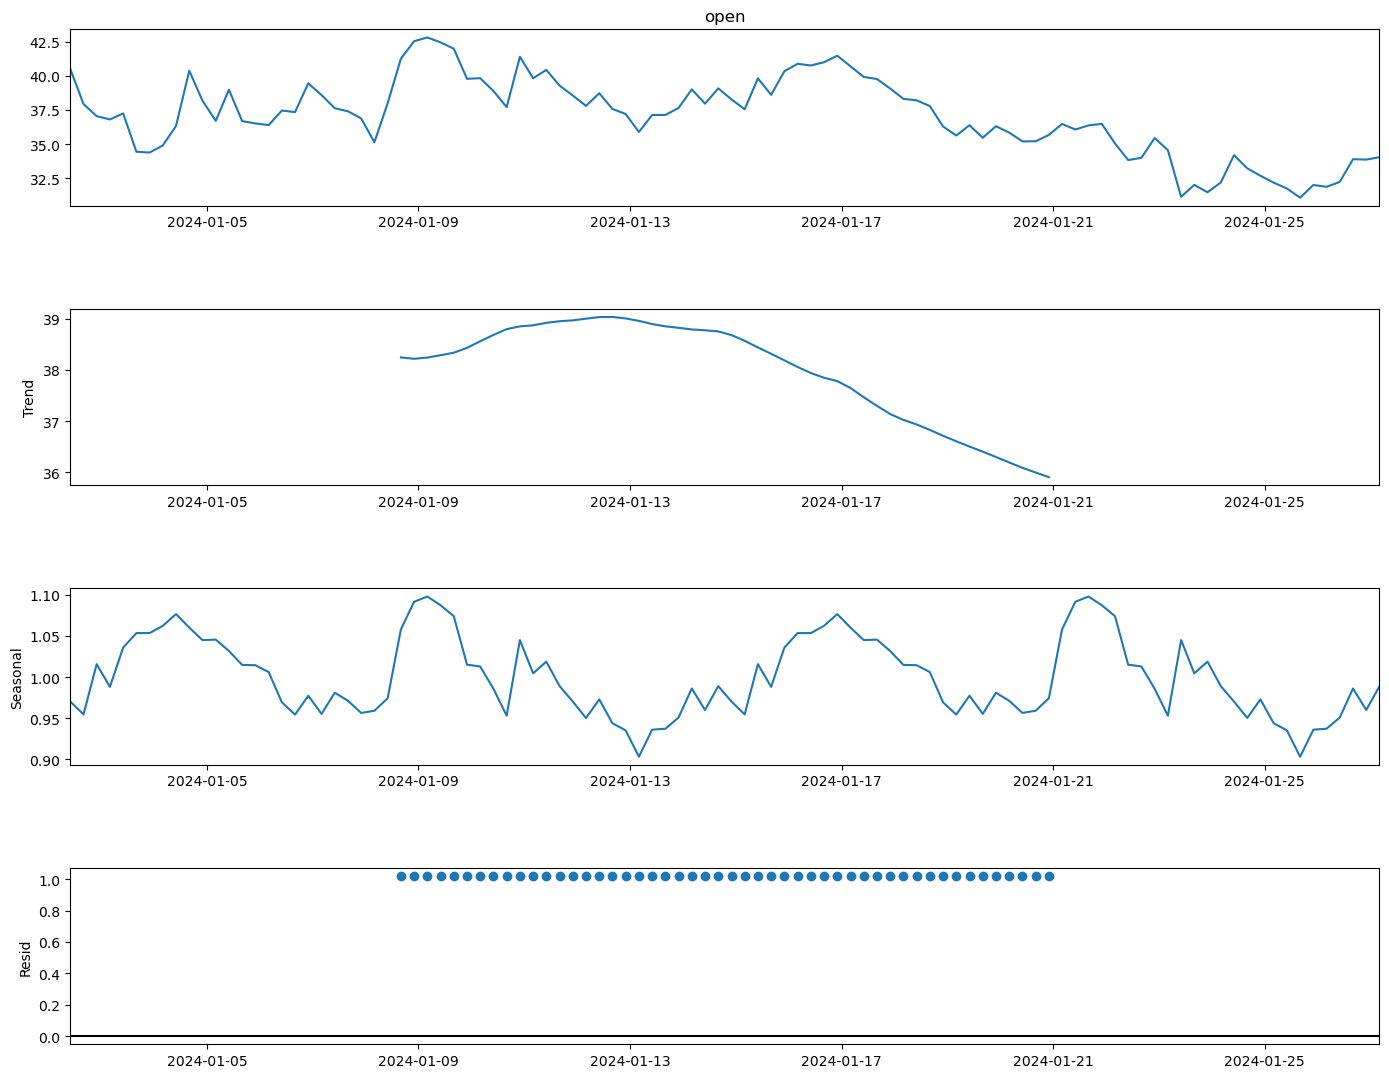

In [208]:
result_add = seasonal_decompose(data['open'], model='multiplicative', period = 50)
with plt.rc_context({'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white'}):
    fig = plt.figure()  
    fig = result_add.plot()  
    fig.set_size_inches(15, 12)

In [301]:
columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume']
date_string_after = ['2023-1-31','2023-2-28','2023-3-31','2023-4-30','2023-5-31',
                     '2023-6-30','2023-7-31','2023-8-31','2023-9-30','2023-10-31','2023-11-30','2023-12-31']

for m in range(1, 2):
    
    month = "2023-" + str(m) + "-1"
    time_before = datetime.strptime(month, "%Y-%m-%d").timestamp()
    time_after = datetime.strptime(date_string_after[m-1], "%Y-%m-%d").timestamp()

    result = market.get_history_candles(
        instId='BTC-USDT',
        before=str(round(time_before*1000)), after=str(round(time_after*1000)), 
        bar='1D'
    )
    # print(len(result['data']))

    print(result['data'])
    # data = pd.DataFrame(result['data'], columns = columns)
    # print(data)
    # data['date'] = pd.to_datetime(data['timestamp'], unit = 'ms')
#     data.sort_values(by='date', inplace=True)
#     data.set_index('date', inplace = True)
#     data.drop('volume', axis=1, inplace = True)
#     data.drop('timestamp', axis=1, inplace = True)
#     arima_data = data["open"]

#     data[['open', 'high', 'low', 'close']] = data[['open', 'high', 'low', 'close']].apply(pd.to_numeric)


[['1675008000000', '23526.9', '23963', '22959.7', '23176.2', '9151.56788494', '214453928.11373213', '214453928.11373213', '1'], ['1674921600000', '23013.8', '23652.4', '22943.1', '23527', '6650.74889002', '155175508.85817875', '155175508.85817875', '1'], ['1674835200000', '22933.3', '23500', '22879.4', '23013.3', '5450.11074822', '125930306.30971327', '125930306.30971327', '1'], ['1674748800000', '22957.7', '23164.7', '22526.3', '22934.4', '7462.68200547', '171020353.958864', '171020353.958864', '1'], ['1674662400000', '22579.2', '23818.7', '22518.3', '22958.1', '11442.10480958', '264592449.8487301', '264592449.8487301', '1'], ['1674576000000', '22928.2', '23083.8', '22332.1', '22579.1', '7568.28582494', '171538273.62752396', '171538273.62752396', '1'], ['1674489600000', '22852.1', '23185.2', '22658', '22928.1', '6513.00931626', '149339202.14282195', '149339202.14282195', '1'], ['1674403200000', '22788.7', '23123.2', '22306.6', '22852', '8692.65624071', '197621704.38064812', '197621704